In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
cleaned=pd.read_parquet("collated_crypto.parquet")

In [3]:
cleaned

,symbol,time,high,low,open,close
0,BTC,2023-04-17,30331.32,29265.91,30322.37,29446.34
1,BTC,2023-04-18,30485.26,29135.27,29446.34,30395.53
2,BTC,2023-04-19,30419.74,28615.79,30395.53,28821.91
3,BTC,2023-04-20,29094.98,28007.09,28821.91,28248.11
4,BTC,2023-04-21,28365.20,27173.44,28248.11,27261.17
...,...,...,...,...,...,...
1093,LTC,2024-04-12,99.51,80.31,98.75,86.16
1094,LTC,2024-04-13,86.60,70.87,86.16,77.50
1095,LTC,2024-04-14,80.44,73.93,77.50,79.82
1096,LTC,2024-04-15,82.87,75.70,79.82,78.11


In [4]:
new = cleaned[cleaned["symbol"] == "BTC"]

In [5]:
x_value=new["time"]
y_value=new["close"]

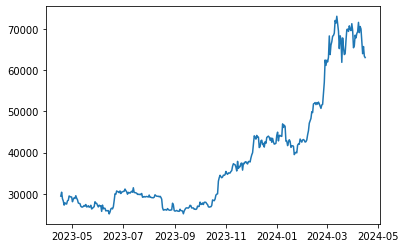

In [6]:
plot=pyplot.plot(x_value,y_value)

In [7]:
returns = np.log(y_value / y_value.shift(1))
returns = returns.fillna(0)

In [8]:
new["returns"]=returns

C:\Users\shupe\AppData\Local\Temp\ipykernel_2176\2739929621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["returns"]=returns


In [9]:
new["main_volatility"]=new["returns"].rolling(window=365,min_periods=1).std()

C:\Users\shupe\AppData\Local\Temp\ipykernel_2176\1756527445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["main_volatility"]=new["returns"].rolling(window=365,min_periods=1).std()


In [10]:
new["ewm_volatility"] = new["returns"].ewm(span=365).std()

C:\Users\shupe\AppData\Local\Temp\ipykernel_2176\1460377226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["ewm_volatility"] = new["returns"].ewm(span=365).std()


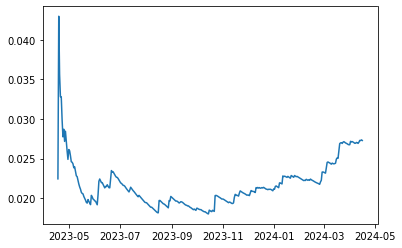

In [11]:
plot=pyplot.plot(x_value,new["ewm_volatility"])

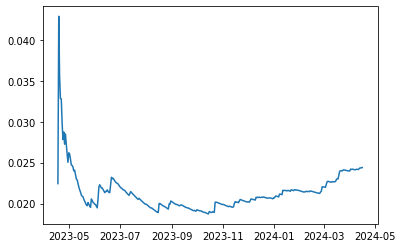

In [12]:
plot=pyplot.plot(x_value,new["main_volatility"])